### Listas

In [1]:
lista1 = []
%timeit lista1 = list(range(1,1000000))

26.8 ms ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
lista2 = []
def f(n):
    for i in range(1,n):
        lista2.append(i)
%timeit f(1000000)

114 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
def f(n):
    lista3=[]
    for i in range(1,n):
        lista3 += [i]
    return lista3
%timeit f(1000000)

109 ms ± 3.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
import numpy as np

In [5]:
%timeit np.array(range(1,1000000))

88.7 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit lista4 = np.array(range(1,1000000))

95.3 ms ± 8.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
f_lambda = lambda n: range(1,n)
%timeit f_lambda(1000000)

321 ns ± 24.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
demo_br = pd.read_csv('C:/Users/user/Downloads/Brazil-2022.csv')

In [10]:
demo_br_melt = demo_br.melt(id_vars='Age', value_vars=['M', 'F'], var_name='Sexo', value_name='Quantidade')
demo_br_melt.columns = ['Idade', 'Sexo', 'Quantidade']

In [11]:
demo_br_melt['Sexo'] = demo_br_melt['Sexo'].str.replace('M', 'Homens').str.replace('F', 'Mulheres')

In [12]:
masc, fem = demo_br_melt.groupby('Sexo')['Quantidade'].sum()
total = masc+fem
percentual_masc = demo_br_melt[demo_br_melt['Sexo'] == "Homens"]['Quantidade'].apply(lambda x: round((x/total)*100,1))
percentual_fem = demo_br_melt[demo_br_melt['Sexo'] == "Mulheres"]['Quantidade'].apply(lambda x: round((x/total)*100,1))

In [13]:
# demo_br_melt['%'] = pd.concat([percentual_masc, percentual_fem], ignore_index=True)
demo_br_melt.head()

,Idade,Sexo,Quantidade
0,0-4,Homens,7171418
1,5-9,Homens,7463198
2,10-14,Homens,7623543
3,15-19,Homens,7989653
4,20-24,Homens,8516657


In [14]:
demo_br_pivot=0
demo_br_pivot = demo_br_melt.copy()

In [15]:
# demo_br_pivot = demo_br_pivot.reset_index()
demo_br.sort_values(by='Age')

,Age,M,F
0,0-4,7171418,6885774
2,10-14,7623543,7332483
20,100+,375,1923
3,15-19,7989653,7712959
4,20-24,8516657,8288782
5,25-29,8611856,8454540
6,30-34,8630945,8562379
7,35-39,8724477,8776387
8,40-44,8119996,8339004
9,45-49,7075746,7421165


In [ ]:
demo_br_cp = demo_br.copy()

In [ ]:
demo_br_cp['Age'] = demo_br_cp['Age'].str.strip().astype('str')

In [ ]:
# demo_br_cp.melt(id_vars=list(demo_br_cp.index), var_name=['Age', 'Sexo'], value_name='Quantidade')
# demo_br_cp_melt = demo_br_cp.melt(id_vars='Age', var_name='Sexo', value_name='Quantidade').info()
demo_br_cp_melt.insert(loc=0, column='col_pivo', value= list(demo_br_cp_melt.index))



In [ ]:
# pd.pivot(data=demo_br_cp_melt, index='Age', columns='Sexo', values='Quantidade')
pd.pivot_table(data=demo_br_cp_melt, index='Age', values='Quantidade', columns= 'Sexo')
# demo_br_cp_melt

In [ ]:
sns.catplot( data=demo_br_melt, x='Idade', y='Quantidade', hue='Sexo', kind='bar')
sns.lineplot( data=demo_br_melt, x='Idade', y='Quantidade', hue='Sexo')

plt.tight_layout()  # Ajusta automaticamente o espaçamento
plt.xticks(rotation=45)

plt.show()

In [ ]:
intervalo = [ pd.Interval(int(a), int(b), closed='both') if (a!='' and b!='') else pd.Interval(int(a), 110, closed='both') for (a, b) in demo_br_cp['Age'].str.replace('+','-', regex=True).str.split('-') ]

In [ ]:
index_interval = pd.IntervalIndex(intervalo)

In [ ]:
# index_interval
demo_br_cp['Age'] = index_interval

In [ ]:
demo_br_cp.rename(columns={'Age': 'Idade', 'M': 'Homens', 'F': "Mulheres"}, inplace=True)

In [ ]:
demo_br_cp['Dif. (H-M)'] = demo_br_cp['Homens'] - demo_br_cp['Mulheres']
demo_br_cp

In [ ]:
# demo_br_cp.plot(x='Idade', y='Dif. (H-M)', kind='bar')
demo_br_cp.set_index('Idade')['Dif. (H-M)']

In [ ]:
demo_br_cp.plot(x='Idade', kind='bar')
demo_br_cp.plot(x='Idade', kind='line')

In [ ]:
demo_br_cp_melt = demo_br_cp.melt(id_vars='Age', var_name='Sexo', value_name='Quantidade')

In [ ]:
# teste= demo_br.melt(id_vars='Age', var_name='Sexo', value_name='Quantidade')
demo_br_cp_melt.plot(demo_br_cp_melt['Age'], demo_br_cp_melt['Quantidade'], kind='line')
# sns.lineplot(data=teste, x=teste['Age'], y=teste['Quantidade'], hue='Sexo')
# sns.barplot(data=teste, x=teste['Age'], y=teste['Quantidade'], hue='Sexo')
# plt.bar( demo_br_cp_melt['Age'], demo_br_cp_melt['Quantidade'])

In [ ]:
demo_br_cp_melt.pivot(index='Age', columns='Sexo', values='Quantidade')

### Matrizes e Algebra Linear

In [17]:
import pandas as pd
import numpy as np

In [18]:
m1=np.array([[1,5,0],[4,7,4],[1,1,0]])
m2=np.array([[7,0,3],[1,4,4],[6,1,0]])
m3=np.array([[5],[1],[-2]])
m4=np.array([[-2,1,3]]) 

In [19]:
print(m1,'\n\n',m2)

[[1 5 0]
 [4 7 4]
 [1 1 0]] 

 [[7 0 3]
 [1 4 4]
 [6 1 0]]


#### Multiplicação de matrizes

In [20]:
np.dot(m2,m1)
# np.dot(m1,m2)

array([[10, 38,  0],
       [21, 37, 16],
       [10, 37,  4]])

In [21]:
m1@m2

array([[12, 20, 23],
       [59, 32, 40],
       [ 8,  4,  7]])

#### Matriz inversa 

In [22]:
np.linalg.inv(m1)@m1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
m2_inv = np.linalg.inv(m2)
m1_inv = np.linalg.inv(m1)

#### Matriz identidade

In [45]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Determinante

In [ ]:
np.linalg.det(m1_inv)

In [ ]:
np.linalg.det(m1)

In [ ]:
m3@m4

#### Criando uma matriz 3x3 com numeros aleatórios

In [47]:
import random
import matplotlib.pyplot as plt
m5 = np.random.randint(0, high=10, size=(3,3), dtype=int)

In [48]:
np.linalg.det(m5)

-471.99999999999983

In [49]:
np.linalg.inv(m1)@m1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Regressão linear

In [50]:
from scipy import stats
coordenadas = np.random.randint(0, high=10, size=(20,2), dtype=int)
x = list(map(lambda x: x[0], coordenadas))
y = list(map(lambda x: x[1], coordenadas))

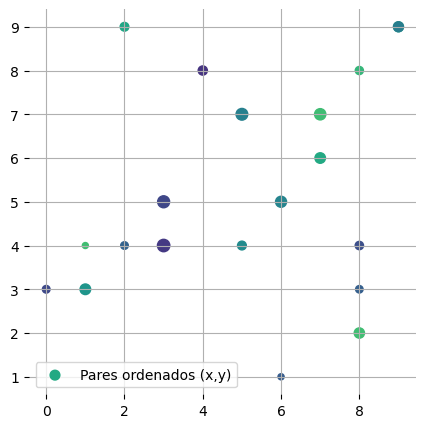

In [51]:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100, label='Pares ordenados (x,y)')
ax.legend()
plt.grid(True)
plt.box(False)
# ax.set(xlim=(-110, 110), ylim=(-110, 110))

plt.show()

In [52]:

#Y = AX + B
A = stats.linregress(x,y)[0]
B = stats.linregress(x,y)[1]

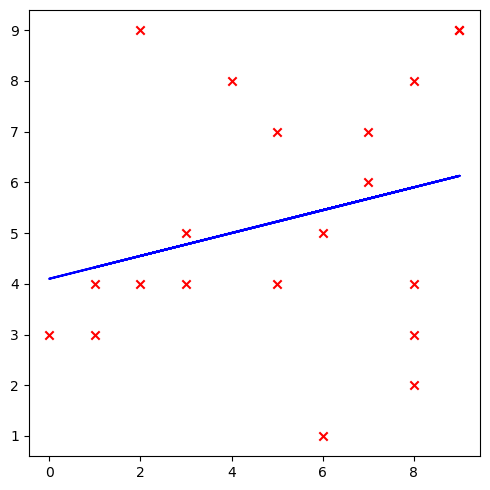

In [53]:
Y = [A*n for n in x] + B
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, label='Pares ordenados (x,y)', color='red', marker='x')

ax.plot(x,Y, label='Dados', color='blue')
plt.tight_layout()
plt.show()

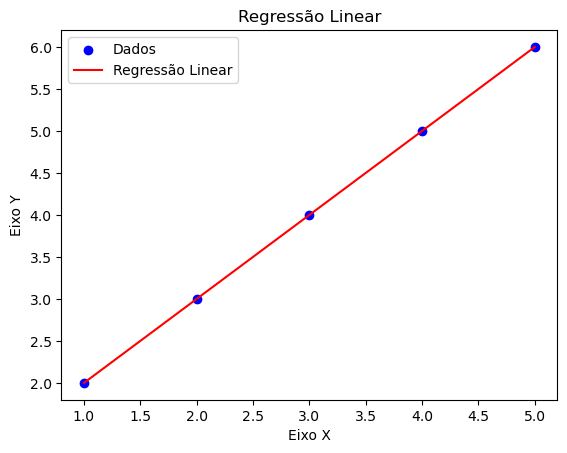

In [54]:
# Dados de exemplo (pares ordenados x e y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# Calcular a regressão linear
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calcular os valores previstos (y_pred) com base na regressão
y_pred = slope * x + intercept

# Plotar o gráfico de dispersão dos dados
plt.scatter(x, y, label='Dados', color='blue')

# Plotar a linha de regressão linear
plt.plot(x, y_pred, label='Regressão Linear', color='red')

# Adicionar rótulos aos eixos e um título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Regressão Linear')

# Adicionar uma legenda
plt.legend()

# Mostrar o gráfico
plt.show()
